# Pile

Bienvenue dans ce chapitre interactif utilisant ThebeLab !

## Exemple de code interactif

```{thebe-button}

---
jupytext:
  text_representation:
    extension: .md
    format_name: myst
    format_version: '0.9'
    jupytext_version: 1.5.2
kernelspec:
  display_name: Python 3
  language: python
  name: python3
---

In [ ]:
### Direct methods
In some special cases we can derive an explicit expression for (an approximation) of the solution of $K(u) = f$. For example, if $K$ represents a quadratic equation in one variable or a system of linear equations. In other cases, we may have an explicit expression for the inverse of a slightly modified forward operator, $\widetilde{K}$. This modified operator arises when the original inverse problem is ill-posed and is replaced by a modified inverse problem $\widetilde{K}(u) = f$ which is well-posed. The hope, in the latter case, is that $\widetilde{K}$ approximates $K$ well for the class of solutions we are looking for.

````{admonition} Example: *Inverting a rank-deficient matrix.*
Consider the matrix 

$$
K = \left(\begin{matrix} 1 & 1\\ 2 & 2 \end{matrix}\right).
$$

Obviously this matrix is singular, so there is no way to define the inverse in the usual sense. However, modifying the matrix slightly

$$
\widetilde{K} = \left(\begin{matrix} 1 + \alpha & 1\\ 2 & 2 + \alpha\end{matrix}\right),
$$

allows us to compute the inverse. Indeed, given $f = K\overline{u}$ with $\overline{u} = (1,2)$ we have $f = (3,6)$. Applying the inverse of $\widetilde{K}$ we get $\widetilde{u} \approx (1,2)$. The corresponding equations are visualized in {numref}`matrix_inversion`.

```{glue:figure} matrix_inversion
:figwidth: 300px
:name: "matrix_inversion"

Original and regularized equations. We see that the regularized equations have a unique solution, but this solution is slightly biased towards the origin.
```

````

```{code-cell} ipython3

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from myst_nb import glue

u1 = np.linspace(0,5,100)
u2 = np.linspace(0,5,100)

fig,ax = plt.subplots(1,1)

alpha = 1e-1

ax.plot(u1,3-u1,'k',label=r'$Ku=f$')
ax.plot(u1,3-(1+alpha)*u1,'r--',label=r'$\widetilde{K}u=f$')
ax.plot(u1,(6-2*u1)/(2+alpha),'r--')

ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_xlim([0.5,1.5])
ax.set_ylim([1.5,2.5])
ax.set_aspect(1)
ax.legend()
plt.show()
glue("matrix_inversion", fig, display=False)
```

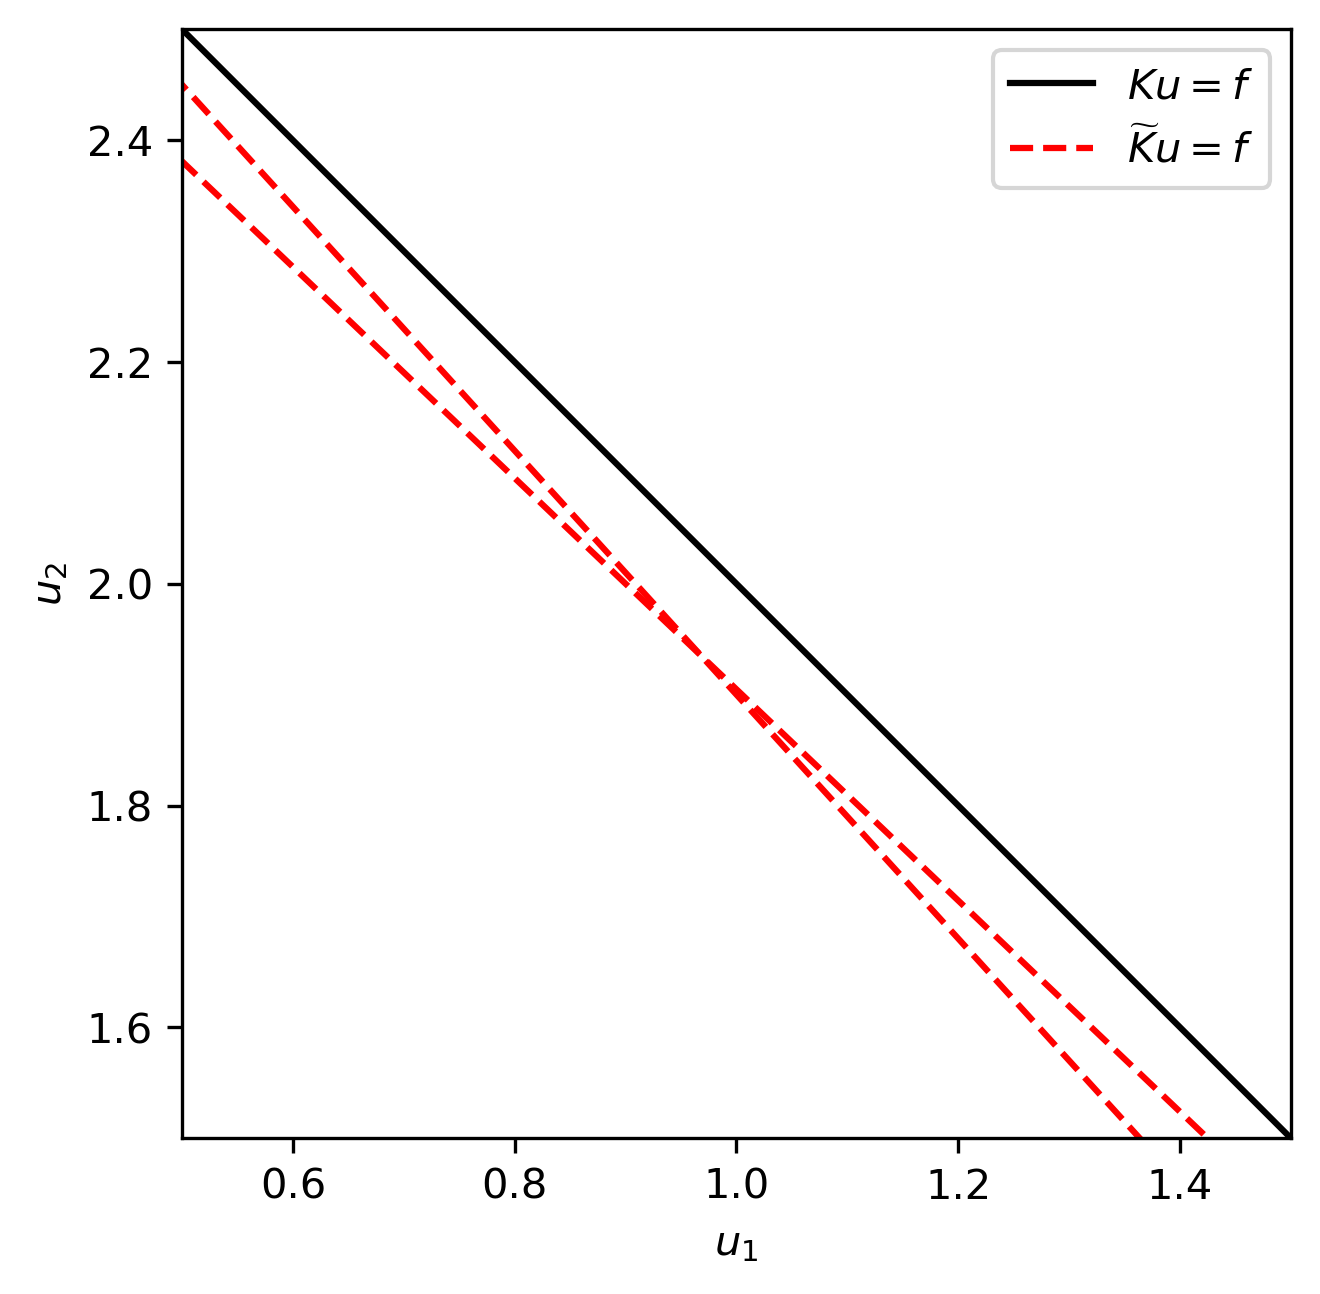

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from myst_nb import glue

u1 = np.linspace(0,5,100)
u2 = np.linspace(0,5,100)

fig,ax = plt.subplots(1,1)

alpha = 1e-1

ax.plot(u1,3-u1,'k',label=r'$Ku=f$')
ax.plot(u1,3-(1+alpha)*u1,'r--',label=r'$\widetilde{K}u=f$')
ax.plot(u1,(6-2*u1)/(2+alpha),'r--')

ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_xlim([0.5,1.5])
ax.set_ylim([1.5,2.5])
ax.set_aspect(1)
ax.legend()
plt.show()
glue("matrix_inversion", fig, display=False)

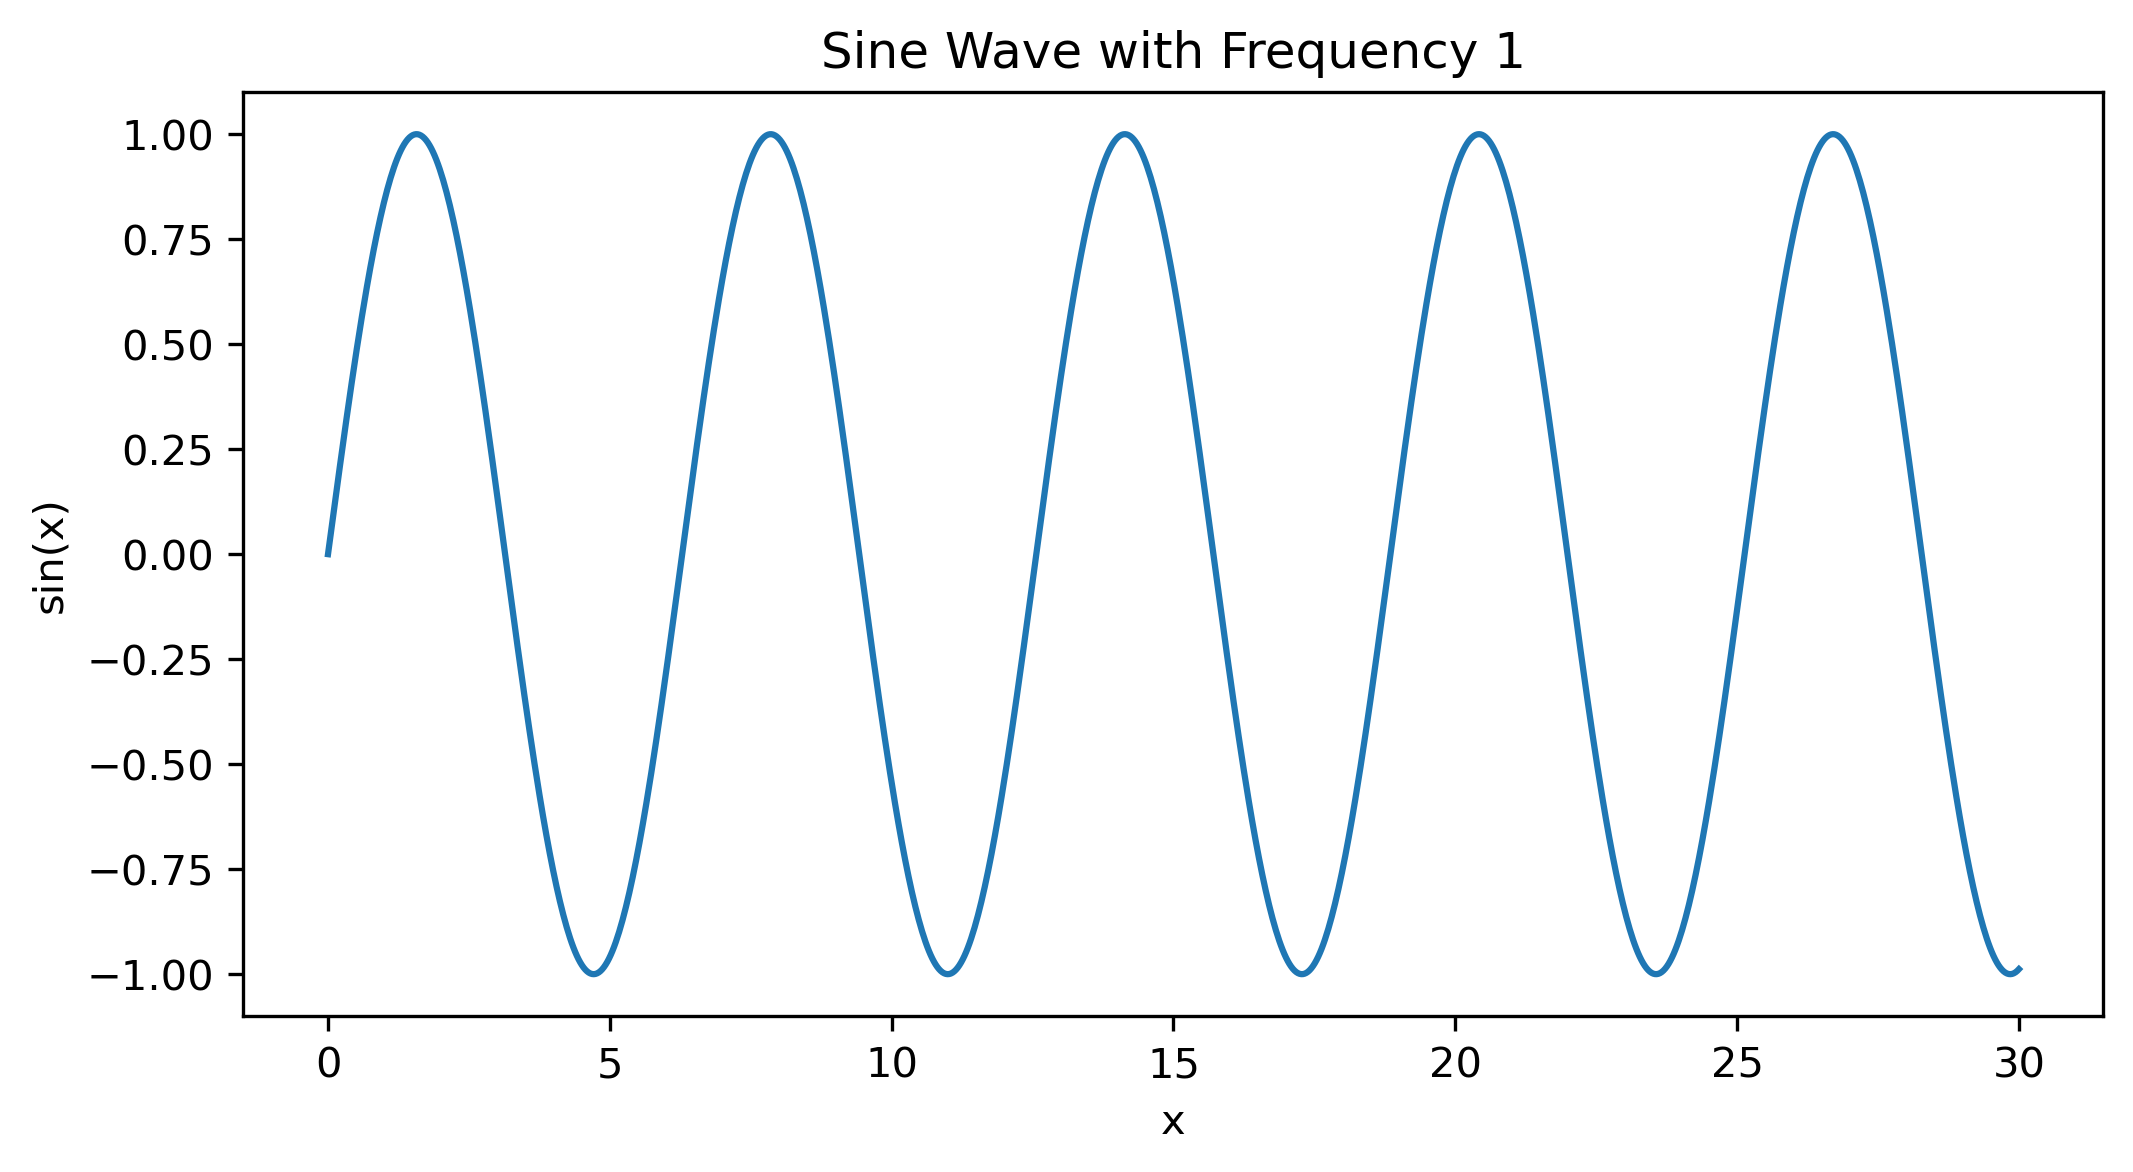

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue

def plot_sine(frequency=1):
    x = np.linspace(0, 30, 1000)
    y = np.sin(frequency * x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.title(f'Sine Wave with Frequency {frequency}')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.show()

plot_sine()
glue("quadratic", plt, display=False)

In [28]:
import dolfinx
import ufl
from mpi4py import MPI

# Votre code dolfinx ici


In [29]:
import dolfinx
print(dolfinx.__version__)

0.8.0


In [12]:
try:
    import dolfinx
    print("dolfinx importé avec succès")
except ImportError as e:
    print(f"Erreur lors de l'importation de dolfinx : {e}")
    import sys
    print(f"Python path : {sys.path}")

dolfinx importé avec succès


In [13]:
import dolfinx
print(f"DOLFINx version: {dolfinx.__version__} based on GIT commit: {dolfinx.git_commit_hash} of https://github.com/FEniCS/dolfinx/")

DOLFINx version: 0.8.0 based on GIT commit:  of https://github.com/FEniCS/dolfinx/


In [14]:
# Importer les modules nécessaires
import pyvista as pv
from pyvista import examples

# Créer une simple sphère
sphere = pv.Sphere(radius=1.0, center=(0, 0, 0))

# Initialiser un Plotter pour afficher la géométrie
plotter = pv.Plotter()
plotter.add_mesh(sphere, color="cyan", show_edges=True)
plotter.add_axes()  # Ajoute des axes pour faciliter la visualisation
plotter.show()

Widget(value='<iframe src="http://localhost:52234/index.html?ui=P_0x1670efb90_3&reconnect=auto" class="pyvista…